In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import testStreamingSvd
import streamingSvd as algo

In [5]:
#import os
#if not os.path.isfile('AR.dat'):
#        print ("Generating and saving data")
#        A = generateARdata(1000)
#        np.savetxt('AR.dat', A)


#dat = np.loadtxt('AR.dat')
row =  30
dat = testStreamingSvd.generateARdata(row,1000)

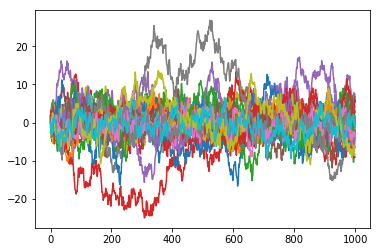

In [6]:
plt.plot(dat.T);

In [7]:
Q, Q_est = algo.getSvd(dat, row, row, 5, 1000)

In [8]:
U, S, V = np.linalg.svd(dat, full_matrices=False)

In [9]:
num_mismatch = 0
for i in range(row):
    if (not np.allclose(Q[:,i], U[:,i], 1e-1, 1e-1) and not np.allclose(Q[:,i],-U[:,i],1e-1, 1e-1)):
        print ("Mismatch in %d column\n"%i)
        for j in range(row):
            if (not np.allclose(Q[j,i], U[j,i], 1e-1, 1e-1) and not np.allclose(Q[j,i],-U[j,i],1e-1, 1e-1)):
                print ("Mismatch in %d row %f %f\n"%(j, Q[j,i], U[j,i]))
        num_mismatch = num_mismatch + 1
print ("Number mismatched: %d\n"%num_mismatch)


Number mismatched: 0



In [10]:
# generate scalar AR(p) data
def generateAR(x_init, coeffs, num_steps, noise=0):
    p = x_init.shape[0]
    xs = np.append(x_init, np.zeros((num_steps)))
    for t in range(num_steps):
        eps = np.random.normal(loc=0, scale=noise)
        xs[t+p] = np.dot(coeffs, xs[t:t+p]) + eps
    return xs

# generate vector AR(1) data
def generateVAR1(x_init, A, num_steps, noise=0):
    n = x_init.shape[0]
    xs = np.append(x_init, np.zeros((n, num_steps)), axis=1)
    for t in range(num_steps):
        eps = np.random.normal(loc=0, scale=noise, size=n)
        xs[:, t+1] = np.dot(A, xs[:, t]) + eps
    return xs

def rotate_3dx(A, theta):
    rot = np.array([[1, 0, 0], 
                    [0, np.cos(theta), -np.sin(theta)], 
                    [0, np.sin(theta), np.cos(theta)]])
    return np.dot(rot, A)


def get_stable_A(n):
    unstable = True
    while unstable:
        A = np.random.uniform(0, 1, size=(n,n))
        vals, _ = np.linalg.eig(A)
        if np.max(np.abs(vals)) < 1:
            unstable = False
    return A

# nice oscillations
# A = np.array([[ 0.9767596 , -0.28857368,  0.4491203 ],
#        [ 0.97991711,  0.49943434,  0.32865101],
#        [ 0.59191832, -0.16951207,  0.57953176]])

In [11]:
n = 3
numsteps1 = 100
numsteps2 = 1000
noise = .1

x_init = np.random.uniform(-1, 1, size=(n, 1))

# stablecoeffs = np.random.uniform(-.1, .1, size=(n,n))
coeffs_new = np.diag(np.random.uniform(0.6, 1.1, size=n))# rotate_3dx(stablecoeffs, -np.pi) 
xs = generateVAR1(x_init, coeffs_new, numsteps1, noise=noise)

x_initnew = np.expand_dims(xs[:, -1], axis=1)
xs_new = generateVAR1(x_initnew, stablecoeffs, numsteps2, noise=noise)
xs = np.append(xs, xs_new, axis=1)

# x_initnew = np.expand_dims(xs[:, -1], axis=1)
# xs_new = generateVAR1(x_initnew, coeffs_new, numsteps1, noise=noise)
# xs = np.append(xs, xs_new, axis=1)

plt.plot(xs.T)
plt.axvline(numsteps1, color='k')
# plt.axvline(numsteps1 + numsteps2)

print(coeffs_new)

NameError: name 'stablecoeffs' is not defined

In [152]:
U1, S1, _ = np.linalg.svd(xs[:, :100])
U2, S2, _ = np.linalg.svd(xs)
print(S1, '\n', S2, '\n------------------')

q1, q1approx = algo.getSvd(xs, k=3, l1=5, l=5, num_iter=19, decay_alpha=.1)
q2, q2approx = algo.getSvd(xs, k=3, l1=10, l=10, num_iter=500, decay_alpha=.1)

# print(U1, '\n', q1, '\n-----------------')
print(q1)
print(q2)

[21.77327945  2.07630831  1.51029421] 
 [79.83069693 32.31734385 10.71889146] 
------------------
[[ 0.99978838 -0.00287509 -0.0203698 ]
 [-0.00961349  0.81011505 -0.58619211]
 [ 0.01818724  0.58626388  0.80991597]]
[[ 0.34348033  0.83454425  0.43076346]
 [ 0.86213156 -0.46210409  0.20781958]
 [ 0.37249219  0.29999283 -0.87821061]]


In [2]:
U,S,V = np.linalg.svd(xs)
print(U)
print('--------------')
Qtrue, Q = algo.getSvd(xs, xs.shape[0], 5, 5, 49, decay_alpha=.9)
print(Qtrue)

print('\n-------------\n')

Q, Q_est = algo.getSvd(xs, k=3, l1=4, l=1, num_iter=96)
print(Q_est)
print('-------------')
Q, Q_est = algo.getSvd(xs, k=3, l1=10, l=1, num_iter=250)
print(Q_est)

NameError: name 'xs' is not defined

[[ 4.16265605 -5.02506093]
 [-8.04071899 -6.01381158]
 [ 4.36109306 -6.29148893]]


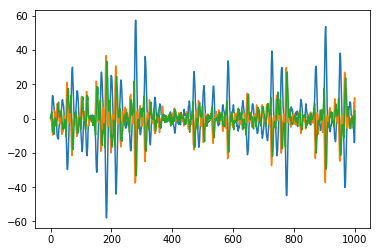

In [145]:
n = 3
numsteps = 1000
theta = np.pi/8 # rotating coeffs slowly across x-axis
noise = 1

x_init = np.random.uniform(size=(n,1))
xs = np.append(x_init, np.zeros((n, numsteps)), axis=1)
curr_coeffs = stablecoeffs
for t in range(1, numsteps):
    curr_coeffs = rotate_3dx(curr_coeffs, theta)
    eps = np.random.normal(loc=0, scale=noise, size=n)
    xs[:, t] = np.dot(curr_coeffs, xs[:, t-1]) + eps
    
plt.plot(xs.T)
# for i in range(9):
#     plt.axvline(16*(i+1))

Q = algo.getSvd(xs, 2, 2, 5, 100)
print(Q)

In [122]:
p = 2
steps = 50

unstable = True
while unstable:
    coeffs = np.random.uniform(low=-1, high=1, size=p)
    root_mags = np.abs(np.roots(coeffs))
    if np.max(root_mags) < 1:
        print(coeffs)
        print(root_mags)
        unstable = False

init = np.array([.5, -.5]).reshape((1,2))
xs = generateAR(init, coeffs, steps, noise=.1)

plt.plot(xs)

[ 0.81029826 -0.37911547]
[0.46787152]


ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)